辨識影片中的人

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


數據準備

In [3]:
!pip install face_recognition 
import face_recognition

     |████████████████████████████████| 100.2MB 57kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=5dae000e9d6a38f3dab8f44baf5215dfd53d16c30b893ef3000d7a9f0a985c04
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
%matplotlib inline 
import csv

from IPython.display import Image
from google.colab import files
import os 
from os.path import isfile, join
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from imutils import paths
import pandas as pd 
import matplotlib.image as mpimg 
from PIL import Image, ImageDraw 
from IPython.display import display 
plt.style.use('classic')

In [5]:
!pwd
!mkdir train
!mkdir test
!mkdir video
!mkdir output

/content/drive/MyDrive


In [6]:
!wget -O ./train/Cook.jpg "https://startuplatte.com/wp-content/uploads/2016/12/tim_cook_apple.jpg"

!wget -O ./train/Jobs.jpg "https://upload.wikimedia.org/wikipedia/commons/b/b9/Steve_Jobs_Headshot_2010-CROP.jpg"

--2021-07-15 05:00:16--  https://startuplatte.com/wp-content/uploads/2016/12/tim_cook_apple.jpg
Resolving startuplatte.com (startuplatte.com)... 54.249.118.138
Connecting to startuplatte.com (startuplatte.com)|54.249.118.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38371 (37K) [image/jpeg]
Saving to: ‘./train/Cook.jpg’

./train/Cook.jpg    100%[===================>]  37.47K  --.-KB/s    in 0.002s  

2021-07-15 05:00:17 (21.5 MB/s) - ‘./train/Cook.jpg’ saved [38371/38371]

--2021-07-15 05:00:17--  https://upload.wikimedia.org/wikipedia/commons/b/b9/Steve_Jobs_Headshot_2010-CROP.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1795374 (1.7M) [image/jpeg]
Saving to: ‘./train/Jobs.jpg’

./train/Jobs.jpg    100%[===================>]   1.71M  --.-KB/s    in 0.07s   

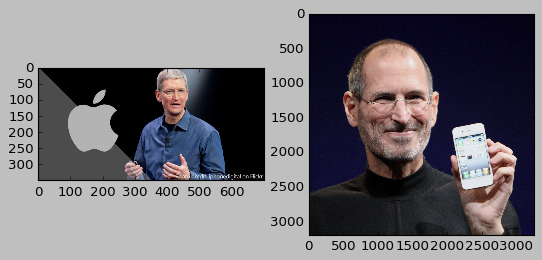

In [7]:
a = mpimg.imread('train/Cook.jpg')
b = mpimg.imread('train/Jobs.jpg')

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.subplot(1, 2, 2)
plt.imshow(b)

In [8]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [9]:
!wget -O ./test/001.jpg "https://agirls.aotter.net/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg" 
!wget -O ./test/002.jpg "https://cimg.cnyes.cool/prod/news/4265553/l/d8bdc76792cf6e344abd1f5986afcaa0.jpg" 
!wget -O ./test/003.jpg "http://1.bp.blogspot.com/-J56W4WP6NhI/UELf6E6sWEI/AAAAAAAAFnw/cSAVmClO37Q/s1600/jonathan_ive_and_steve_jobs.jpg" 
!wget -O ./test/004.jpg "https://i2.cdn.turner.com/cnn/2011/TECH/innovation/08/25/tim.cook.apple.employees.ars/t1larg.tim.cook.steve.jobs.jpg"
!wget -O ./test/005.jpg "https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2017/02/Screen-Shot-2017-02-09-at-16.32.05.png"

--2021-07-15 05:04:54--  https://agirls.aotter.net/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg
Resolving agirls.aotter.net (agirls.aotter.net)... 139.59.219.151
Connecting to agirls.aotter.net (agirls.aotter.net)|139.59.219.151|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://agirls.aottercdn.com/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg [following]
--2021-07-15 05:04:55--  https://agirls.aottercdn.com/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg
Resolving agirls.aottercdn.com (agirls.aottercdn.com)... 139.162.94.253, 139.162.95.64, 139.162.94.209, ...
Connecting to agirls.aottercdn.com (agirls.aottercdn.com)|139.162.94.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43555 (43K) [image/jpeg]
Saving to: ‘./test/001.jpg’

./test/001.jpg      100%[===================>]  42.53K   191KB/s    in 0.2s    

2021-07-15 05:04:56 (191 KB/s) - ‘./test/001.jpg’ saved [43555/43555]

--2021-07-15 05:04:56--  htt

In [10]:
!pip install face_recognition 
import face_recognition

In [11]:
%matplotlib inline 
import csv

from IPython.display import Image
from google.colab import files
import os 
from os.path import isfile, join
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
from imutils import paths
import pandas as pd 
import matplotlib.image as mpimg 
from PIL import Image, ImageDraw 
from IPython.display import display 
plt.style.use('classic')

In [12]:
!pwd
!mkdir train
!mkdir test
!mkdir video
!mkdir outpu

/content/drive/My Drive
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘video’: File exists


In [13]:
from google.colab import files
uploaded = files.upload()

In [14]:
!wget -O ./train/Cook.jpg "https://startuplatte.com/wp-content/uploads/2016/12/tim_cook_apple.jpg"

!wget -O ./train/Jobs.jpg "https://upload.wikimedia.org/wikipedia/commons/b/b9/Steve_Jobs_Headshot_2010-CROP.jpg"

--2021-07-15 05:06:26--  https://startuplatte.com/wp-content/uploads/2016/12/tim_cook_apple.jpg
Resolving startuplatte.com (startuplatte.com)... 54.249.118.138
Connecting to startuplatte.com (startuplatte.com)|54.249.118.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38371 (37K) [image/jpeg]
Saving to: ‘./train/Cook.jpg’

./train/Cook.jpg    100%[===================>]  37.47K  --.-KB/s    in 0.001s  

2021-07-15 05:06:28 (61.7 MB/s) - ‘./train/Cook.jpg’ saved [38371/38371]

--2021-07-15 05:06:28--  https://upload.wikimedia.org/wikipedia/commons/b/b9/Steve_Jobs_Headshot_2010-CROP.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1795374 (1.7M) [image/jpeg]
Saving to: ‘./train/Jobs.jpg’

./train/Jobs.jpg    100%[===================>]   1.71M  --.-KB/s    in 0.07s   

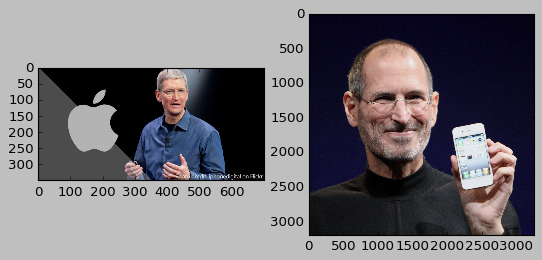

In [15]:
a = mpimg.imread('train/Cook.jpg')
b = mpimg.imread('train/Jobs.jpg')

plt.subplot(1, 2, 1)
plt.imshow(a)
plt.subplot(1, 2, 2)
plt.imshow(b)

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [16]:
!wget -O ./test/001.jpg "https://agirls.aotter.net/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg" 
!wget -O ./test/002.jpg "https://cimg.cnyes.cool/prod/news/4265553/l/d8bdc76792cf6e344abd1f5986afcaa0.jpg" 
!wget -O ./test/003.jpg "http://1.bp.blogspot.com/-J56W4WP6NhI/UELf6E6sWEI/AAAAAAAAFnw/cSAVmClO37Q/s1600/jonathan_ive_and_steve_jobs.jpg" 
!wget -O ./test/004.jpg "https://i2.cdn.turner.com/cnn/2011/TECH/innovation/08/25/tim.cook.apple.employees.ars/t1larg.tim.cook.steve.jobs.jpg"
!wget -O ./test/005.jpg "https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2017/02/Screen-Shot-2017-02-09-at-16.32.05.png"

--2021-07-15 05:09:30--  https://agirls.aotter.net/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg
Resolving agirls.aotter.net (agirls.aotter.net)... 139.59.219.151
Connecting to agirls.aotter.net (agirls.aotter.net)|139.59.219.151|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://agirls.aottercdn.com/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg [following]
--2021-07-15 05:09:31--  https://agirls.aottercdn.com/media/61d7d10f-b7a2-4f7a-811f-7e6f54e9f29f.jpg
Resolving agirls.aottercdn.com (agirls.aottercdn.com)... 139.162.94.253, 139.162.95.64, 139.162.94.209, ...
Connecting to agirls.aottercdn.com (agirls.aottercdn.com)|139.162.94.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43555 (43K) [image/jpeg]
Saving to: ‘./test/001.jpg’

./test/001.jpg      100%[===================>]  42.53K   195KB/s    in 0.2s    

2021-07-15 05:09:32 (195 KB/s) - ‘./test/001.jpg’ saved [43555/43555]

--2021-07-15 05:09:33--  htt

總圖片數量 5 ['test/001.jpg', 'test/002.jpg', 'test/003.jpg', 'test/004.jpg', 'test/005.jpg']


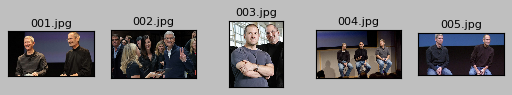

In [21]:
imagePaths=sorted(list(paths.list_images('test')))

num = len(imagePaths)
print('總圖片數量',num,imagePaths)
for i in range(0, num): 
        ax=plt.subplot(5,5, 1+i) 
        img=mpimg.imread(imagePaths[i])
        ax.imshow(img) 
        title = imagePaths[i].split(os.path.sep)[-1] 
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([]); ax.set_yticks([]) 
plt.show()

In [22]:
!ls video

In [ ]:
#https://www.youtube.com/watch?v=eAo8gnUCWzE
#https://www.youtube.com/embed/YUGMKkQm_U8

In [23]:
input_movie = cv2.VideoCapture("video/test.mp4")

length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = input_movie.get(cv2.CAP_PROP_FPS)
sec = length/fps 
print('待測影片一共有',length,'幀frame')
print('解析度=',width,'x',height)
print('FPS=',fps,'幀/秒')
print('影片總時間=',int(length/fps/60),'分:',int((length/fps)%60),'秒','=',length/fps,'秒')

ZeroDivisionError: ignored

Frames per second簡稱FPS（也有文獻稱之為Frame rate,幀率），是每秒幀數的意思。

In [24]:
length = 1668 ; sec = 69.5
print(length,sec)
int(length/sec)

1668 69.5


24

In [25]:
#Cook
Cook_image = face_recognition.load_image_file("train/Cook.jpg")
Cook_face_encoding = face_recognition.face_encodings(Cook_image)[0]
#Jobs
Jobs_image = face_recognition.load_image_file("train/Jobs.jpg")
Jobs_face_encoding = face_recognition.face_encodings(Jobs_image)[0]
print(Jobs_face_encoding.shape) #每張人臉128個特徵向量
Jobs_face_encoding[:30]

(128,)


array([-0.18664443,  0.15888654,  0.09709549, -0.06937829, -0.21982631,
       -0.01550315, -0.06245174, -0.07452237,  0.05417104, -0.01115596,
        0.29935056,  0.02284984, -0.26518953,  0.02722079, -0.05526765,
        0.09818216, -0.11054996, -0.05499554, -0.15013328, -0.18054083,
        0.02446705,  0.01751703, -0.04133295,  0.01528975, -0.18201461,
       -0.20113564, -0.01714472, -0.06549148,  0.18597484, -0.17351529])

觀念2 match

In [26]:
# compare_faces 找出 match 了誰
import numpy as np
# 使用128特徵向量比對人物
# match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.60)
match = [True,  False, False, True, True, False, True, False, False]
#match = [ False, True]
names=["Cook","Jobs"] 
#使用 np.where
list(np.where(match)[0])

[0, 3, 4, 6]

觀念3  zip函數

In [27]:
# zip函數 倆倆 配成對
a = [1,2,3]
b = [4,5,6]
zipped = list(zip(a,b)) 
zipped

[(1, 4), (2, 5), (3, 6)]

In [28]:
# 更新matchs (match matchs)
names=["Cook","Jobs"]
match=[ False, True]
matchs=[ True, False]
# or 或 邏輯運算 有一個就算成立
matchs = [a or b for a, b in zip(matchs, match)]
matchs

[True, True]

自訂函數可重複使用

In [30]:
# 圖片識別並標示人名(幀, 關鍵人物特徵向量list, 人物名字list, 人物出現次數累計 )
def Face_name(frame, known_faces, names, name_count):
    # BGR 轉成 RGB ，因為 BGR(OpenCV) RGB(face_recognition)
    rgb_frame = frame[:, :, ::-1]
    # 把圖片中所有的人臉找出來
    face_locations = face_recognition.face_locations(rgb_frame)
    # 使用face_locations取得圖片中所有人臉的128特徵向量
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
    #face_names 存放圖片中所有找到人名
    face_names = [] #初始為空list
    matchs=[False]*len(names)
    #依序將圖片中每個臉的128特徵向量處理
    for face_encoding in face_encodings:
        match=[]
        name = None
        # 使用compare_faces 128特徵向量 已知人物比對未知 容錯率 tolerance=0.60可調
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.60)
        if len(match) == 0: #沒找到 直接跳出for
            continue
        check=list(np.where(match)[0]) # np.where哪一個match索引值是True -> 找到誰 names
        if len(check)==0: #沒找到關鍵人物 
            face_names.append(name)
            continue #跳出for
        else: #有找到關鍵人物
            name = names[check[0]] #對應人名
            name_count[check[0]] = name_count[check[0]]+1 #累計加1
            face_names.append(name) #人名加入清單
        matchs = [a or b for a, b in zip(matchs, match)] #更新matchs

    # 將找到的人物標示出來 zip配對 人臉位置 與 人名
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue #沒找到人名 直接跳出for

        #繪製人臉框
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        #繪製文字底色
        cv2.rectangle(frame, (left, bottom +20), (right, bottom), (0, 0, 255), cv2.FILLED)
        #顯示人名文字
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom + 16), font, 0.5, (255, 255, 255), 1)
    return frame, matchs, name_count, face_locations,face_names
#函數回傳 幀(已加工), 比對結果, 出現次數計數, 所有人臉位置, 所有人臉名字

圖片標示人名


數量要一致: 2 2
[True, True] [1, 1] [(90, 501, 126, 465), (106, 353, 142, 317), (114, 229, 150, 193)] [None, 'Jobs', 'Cook']


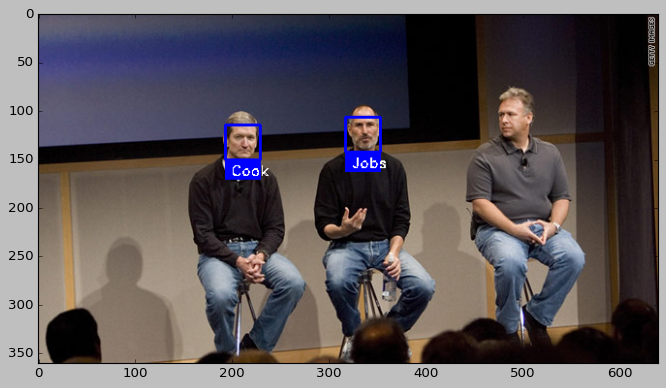

In [31]:
# 使用自訂函數 (幀, 關鍵人物特徵向量list, 人物名字list )
frame = face_recognition.load_image_file("test/004.jpg") #測試其他圖片
#要識別的對象 全部 加入list
known_faces = [Cook_face_encoding, Jobs_face_encoding ]
names=["Cook","Jobs"] 
name_count =[0]*len(names)
print('數量要一致:',len(names),len(known_faces))
#幀(已加工),比對結果,出現次數計數, 所有人臉位置, 所有人臉名字 
#       =Face_name(幀, 關鍵人物特徵向量list, 人物名字list , 人物出現次數累計)
frame, matchs, name_count2, face_locations, face_names\
        = Face_name(frame,known_faces,names,name_count)

print( matchs, name_count2,face_locations,face_names)
plt.figure(figsize=(10,6))
plt.imshow(frame)

In [32]:
# 載入待測影片
#載入待測影片
input_movie = cv2.VideoCapture("video/test.mp4")
#取得影片參數 
# length總共有幾個幀(影格)，一個幀等於一張圖片
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = input_movie.get(cv2.CAP_PROP_FPS)
#要識別的對象 全部 加入list
known_faces = [Cook_face_encoding, Jobs_face_encoding ]
names=["Cook","Jobs"] #,"me"
name_count =[0]*len(names) #人物出現次數累計
if len(names) != len(known_faces):
    print('error..數量不一致:',len(names),len(known_faces))
else:
    print('Ok! 數量有一致:',len(names),len(known_faces))

# 定義與初始化變數
face_locations = []
face_encodings = []
face_names = []
frame_number = 0  #計數器 第幾幀

Ok! 數量有一致: 2 2


In [33]:
!mkdir output-test

In [35]:
#迴圈處理每一幀圖片
%%time
print('... 開始 ...')
while True:
    # 讀取影片
    ret, frame = input_movie.read()
    # 計數器 第幾幀 
    frame_number += 1
    # 如果到了影片結尾跳出迴圈
    if not ret:
        break
    #使用自訂函數
    #幀(已加工),比對結果,出現次數計數, 所有人臉位置, 所有人臉名字 
    #       =Face_name(幀, 關鍵人物特徵向量list, 人物名字list , 人物出現次數累計)
    frame, matchs, name_count, face_locations, face_names\
            = Face_name(frame,known_faces,names,name_count)

    # 這一張frame位於影片的時間
    time= round(length/fps/length*frame_number, 2) # round四捨五入
    #顯示識別結果
    print("{} {} / {}".format(time,frame_number, length),
          'Cook=',matchs[0],name_count[0],' Jobs=',matchs[1],name_count[1])

    # 處理後的幀(已加工)輸出成圖片 同學練習時要修改資料夾名稱 避免覆蓋
    cv2.imwrite('output-test/'+str(frame_number)+'.jpg', frame)
    #紀錄識別結果 寫入csv檔案 同學練習時要修改.csv檔名 避免覆蓋
    with open('output-test.csv', 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow([time, frame_number, matchs[0], name_count[0], matchs[1], name_count[1]])

input_movie.release() #釋放資源
cv2.destroyAllWindows() #關閉所有cv2視窗
print('Cook=',name_count[0],' Jobs=',name_count[1])

... 開始 ...
Cook= 0  Jobs= 0
CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.26 ms


In [36]:
name_count =[530, 238]
print(name_count)
print('Cook在影片中總共出現 =', round(name_count[0]/fps,2) ,'sec')
print('Jobs在影片中總共出現 =', round(name_count[1]/fps,2) ,'sec')

[530, 238]


ZeroDivisionError: ignored